## **Incheon port data Online-PCA**

Include artificial ouliter data

- Inputs: Time-serise data (i.e., GC, TT, Temp)
- Outputs: Outlier score

writteny by seungsab (2022.11.15)
Edited bt taemin (2023.07.25)

In [1]:
import pandas as pd
import numpy as np
import scipy.io
import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [2]:
currentPath = os.getcwd()

print(currentPath)

C:\Users\tm951\OneDrive\바탕 화면\24.05 Measurements\Data\online_PCA


In [3]:
os.chdir("./content")

currentPath = os.getcwd()

print(currentPath)

C:\Users\tm951\OneDrive\바탕 화면\24.05 Measurements\Data\online_PCA\content


In [4]:

df_raw = pd.read_excel('TT_1_sig1_12.xlsx')
df_raw.rename(columns = {'Time':'date'}, inplace=True)
# df_raw = pd.read_excel('data_11_months.xlsx')
# df_raw = df_raw.iloc[:,1:]S
# df_raw.rename(columns = {'Unnamed: 0':'date'}, inplace=True)

print(df_raw)
    
#plt.plot(df_PSD0.columns)

#plt.show()


                     date   CG_1   CG_2   CG_3   CG_4      TT_1   TT_2   TT_3  \
0     2022-10-01 00:00:00  1.130 -0.005  0.893 -0.106 -0.020000 -0.336 -0.006   
1     2022-10-01 00:10:00  1.139 -0.006  0.897 -0.105 -0.020000 -0.336 -0.006   
2     2022-10-01 00:20:00  1.145 -0.007  0.902 -0.105 -0.021000 -0.336 -0.006   
3     2022-10-01 00:30:00  1.153 -0.009  0.907 -0.105 -0.021000 -0.337 -0.006   
4     2022-10-01 00:40:00  1.161 -0.012  0.913 -0.106 -0.021000 -0.337 -0.007   
...                   ...    ...    ...    ...    ...       ...    ...    ...   
56113 2023-10-31 23:10:00  2.625 -0.081  2.144 -0.172  0.041763 -0.099  0.041   
56114 2023-10-31 23:20:00  2.627 -0.083  2.145 -0.172  0.040763 -0.099  0.041   
56115 2023-10-31 23:30:00  2.630 -0.085  2.146 -0.172  0.040763 -0.099  0.041   
56116 2023-10-31 23:40:00  2.633 -0.087  2.147 -0.172  0.040763 -0.099  0.041   
56117 2023-10-31 23:50:00  2.635 -0.089  2.148 -0.172  0.040763 -0.099  0.041   

        TT_4  TC_1_Avg  TC_

In [5]:
# 월, 일(00시) 기준 인덱스 찾아주는 코드

df_raw['date'] = pd.to_datetime(df_raw['date'])

def find_date(yy, mon, day):
  for i in range(0,len(df_raw)):
    if df_raw.iloc[i,0].year == yy:
      if df_raw.iloc[i,0].month == mon: 
        if df_raw.iloc[i,0].day == day:
          X = i
          break
        else:
          continue
  return X

In [6]:
det_date1 = find_date(2022, 10, 1)
# det_date1 = 0

# 2022/10/1 00시 인덱스 찾기 테스트
print(det_date1)

0


In [7]:
# TT_2 && TT_4 초기 데이터(8월말 ~ 9월) 삭제

df_raw_tt = df_raw.iloc[det_date1:,:]
df_raw_tt.index = pd.RangeIndex(len(df_raw_tt)) #index reset
df_raw_tt


,date,CG_1,CG_2,CG_3,CG_4,TT_1,TT_2,TT_3,TT_4,TC_1_Avg,TC_2_Avg,Batt_Volt_Avg,PTemp_C_Avg,waterlevel
0,2022-10-01 00:00:00,1.130,-0.005,0.893,-0.106,-0.020000,-0.336,-0.006,-0.582,19.57,18.82,13.78,19.20,309
1,2022-10-01 00:10:00,1.139,-0.006,0.897,-0.105,-0.020000,-0.336,-0.006,-0.583,19.49,18.69,13.78,19.03,284
2,2022-10-01 00:20:00,1.145,-0.007,0.902,-0.105,-0.021000,-0.336,-0.006,-0.583,19.43,18.57,13.78,18.86,261
3,2022-10-01 00:30:00,1.153,-0.009,0.907,-0.105,-0.021000,-0.337,-0.006,-0.583,19.34,18.22,13.78,18.73,241
4,2022-10-01 00:40:00,1.161,-0.012,0.913,-0.106,-0.021000,-0.337,-0.007,-0.583,19.27,17.98,13.79,18.61,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56113,2023-10-31 23:10:00,2.625,-0.081,2.144,-0.172,0.041763,-0.099,0.041,-0.475,16.69,17.44,12.93,18.43,248
56114,2023-10-31 23:20:00,2.627,-0.083,2.145,-0.172,0.040763,-0.099,0.041,-0.475,16.69,17.40,12.94,18.40,227
56115,2023-10-31 23:30:00,2.630,-0.085,2.146,-0.172,0.040763,-0.099,0.041,-0.475,16.67,17.38,12.93,18.36,207
56116,2023-10-31 23:40:00,2.633,-0.087,2.147,-0.172,0.040763,-0.099,0.041,-0.475,16.66,17.39,12.93,18.33,188


In [8]:
# 월, 일(00시) 기준 인덱스 찾아주는 코드

df_raw_tt['date'] = pd.to_datetime(df_raw_tt['date'])

def find_date2(yy, mon, day):
  for i in range(0,len(df_raw_tt)):
    if df_raw_tt.iloc[i,0].year == yy:
      if df_raw_tt.iloc[i,0].month == mon: 
        if df_raw_tt.iloc[i,0].day == day:
          X = i
          break
        else:
          continue
  return X

In [9]:
# Date Label
point1 = find_date(2022, 11, 1)
point2 = find_date(2023, 1, 1)
point3 = find_date(2023, 3, 1)
point4 = find_date(2023, 5, 1)
point5 = find_date(2023, 7, 1)

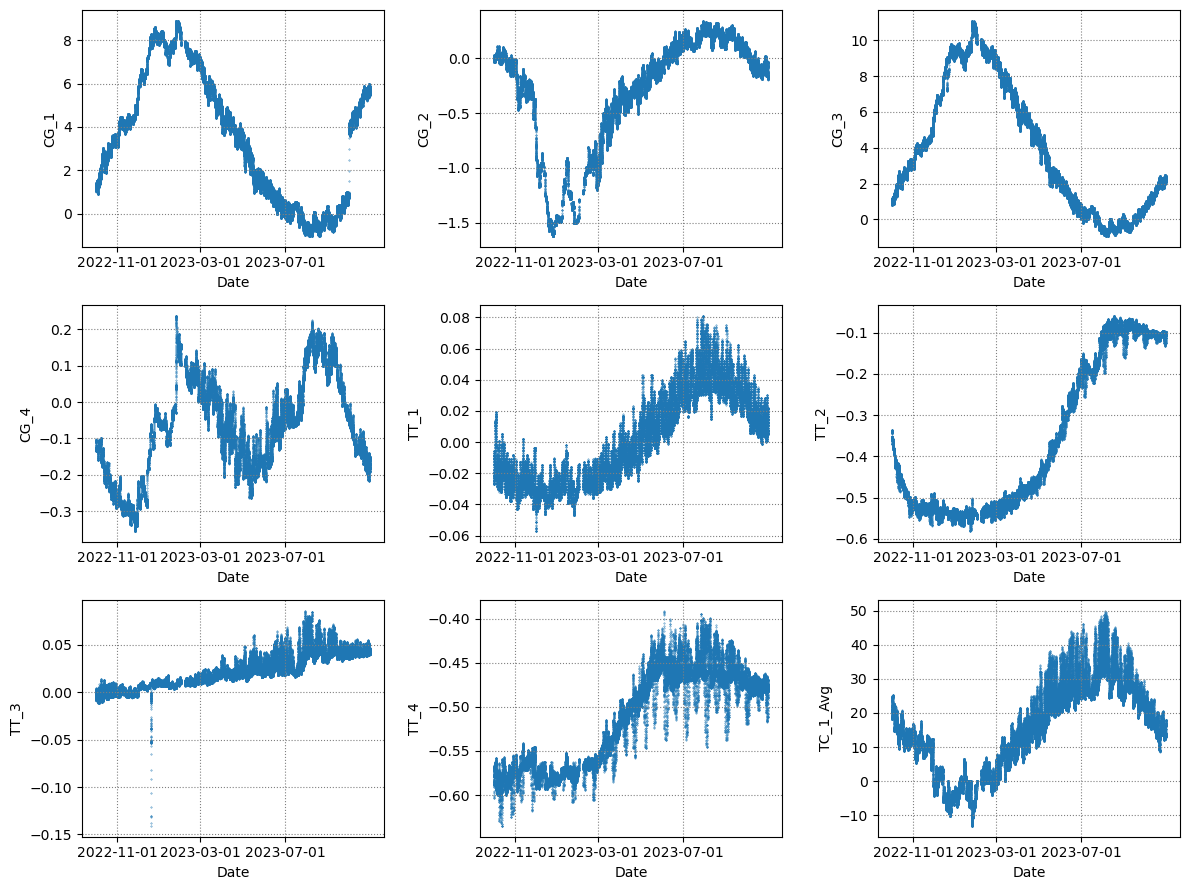

In [10]:
plt.figure(figsize=(12, 9))

for i in range(1,10):

  plt.subplot(3,3,i)
  plt.scatter(df_raw_tt.iloc[:,0],df_raw_tt.iloc[:,i], s=0.1)
  plt.xlabel('Date')
  plt.ylabel(df_raw_tt.columns[i])
  plt.xticks([df_raw_tt.iloc[point1, 0], df_raw_tt.iloc[point3, 0], df_raw_tt.iloc[point5, 0]])
  plt.grid(True, linestyle=':', color='gray')

plt.tight_layout()

plt.show()

In [10]:
# Training 부분 만들기 (index1 ~ index 2)
index1 = find_date2(2022, 10, 1)
index2 = find_date2(2023, 9, 30)

print(index1)
print(index2)

0
51510


In [11]:
outpoint = pd.DataFrame(columns=['data'])

CA = 1

if CA == 1:
    outpoint.loc[0] = find_date2(2023,10,1)
#     outpoint.loc[1] = find_date2(2023,6,1)
else:
    outpoint.loc[0] = find_date2(2023,5,1)


print(outpoint)

    data
0  51654


In [12]:
# df_raw_tt 행렬의 행 개수를 확인하여 행렬 생성
num_rows = df_raw_tt.shape[0]
df_label0 = pd.DataFrame(np.ones((num_rows, 1)), columns=['label'])

df_label0.iloc[index1:index2, :] = 0

print(df_label0)



       label
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
...      ...
56113    1.0
56114    1.0
56115    1.0
56116    1.0
56117    1.0

[56118 rows x 1 columns]


In [13]:
# select_columns = [1, 9]

if CA == 1:
    select_columns = [1, 2, 5, 6]
else:
    select_columns = [3, 4, 7, 8]

df_input = df_raw_tt.iloc[:, select_columns]

df_input

,CG_1,CG_2,TT_1,TT_2
0,1.130,-0.005,-0.020000,-0.336
1,1.139,-0.006,-0.020000,-0.336
2,1.145,-0.007,-0.021000,-0.336
3,1.153,-0.009,-0.021000,-0.337
4,1.161,-0.012,-0.021000,-0.337
...,...,...,...,...
56113,2.625,-0.081,0.041763,-0.099
56114,2.627,-0.083,0.040763,-0.099
56115,2.630,-0.085,0.040763,-0.099
56116,2.633,-0.087,0.040763,-0.099


#### **Step #2: Split Train and Test datasets**

In [14]:
def run_all(train_ratio, df_label0, outpoint):
# Normal data
    bool_normal = (df_label0['label'] == 0)
    ind_train = int(df_input[bool_normal].shape[0] * train_ratio)

    # Split train and test datasets
    Xtrain, Ytrain = df_input.iloc[:ind_train, :], df_label0[:ind_train]
    Xvalid, Yvalid = df_input.iloc[ind_train:df_input[bool_normal].shape[0], :], df_label0[ind_train:df_input[bool_normal].shape[0]]
    Xtest, Ytest = df_input.iloc[df_input[bool_normal].shape[0]:, :], df_label0[df_input[bool_normal].shape[0]:]

    # Plotting
    plt.figure(figsize=(10, 8), dpi=200)
    plt.scatter(Ytrain.index, Ytrain.values, c='b', label='Train')
    plt.scatter(Yvalid.index, Yvalid.values, c='g', label='Valid')
    plt.scatter(Ytest.index, Ytest.values, c='r', label='Test')
    plt.grid(ls=':', color='gray')
    plt.xlabel('# Time Index')
    plt.ylabel('Train, Valid, Test')
    plt.legend()
    plt.show()

    # Define train and test data
    Xtrain_ = Xtrain.values
    Xvalid_ = Xvalid.values
    Xtest_ = Xtest.values

    from Utils.SS_Anomaly_Online_learning_out_kmeans import pca_online

    anomaly_setting = {
        "method_Ncomp": 'eigengap',  # 'CPV' // 'eigengap'
        "alpha": 0.99,
        "cutoff": 0.95,
        "component_use": 'major',  # 'major' // 'minor'
        "method_thresh": 'threhold_from_Gaussian',  # percentile
        "gmm_run": True,  # True // False
        "score_type" : 'SPE' #SPE(Q) or else(t2)
    }

    Anomaly_detector = pca_online(**anomaly_setting)
    Anomaly_detector.fit_initial_pca(Xtrain_)

    for ind, x in enumerate(Xvalid_):
        print(f'Valid: {ind} // {Xvalid_.shape[0]}', end='\r')
        Xnew = x.reshape(1, -1)
        Anomaly_detector.fit_online_pca(Xnew)

    for ind, x in enumerate(Xtest_):
        print(f'Test: {ind} // {Xtest_.shape[0]}', end='\r')
        Xnew = x.reshape(1, -1)
        Anomaly_detector.fit_online_pca(Xnew)

    Anomaly_detector.plot_result(f'Training Ratio : {train_ratio * 100} %', df_label0, outpoint)



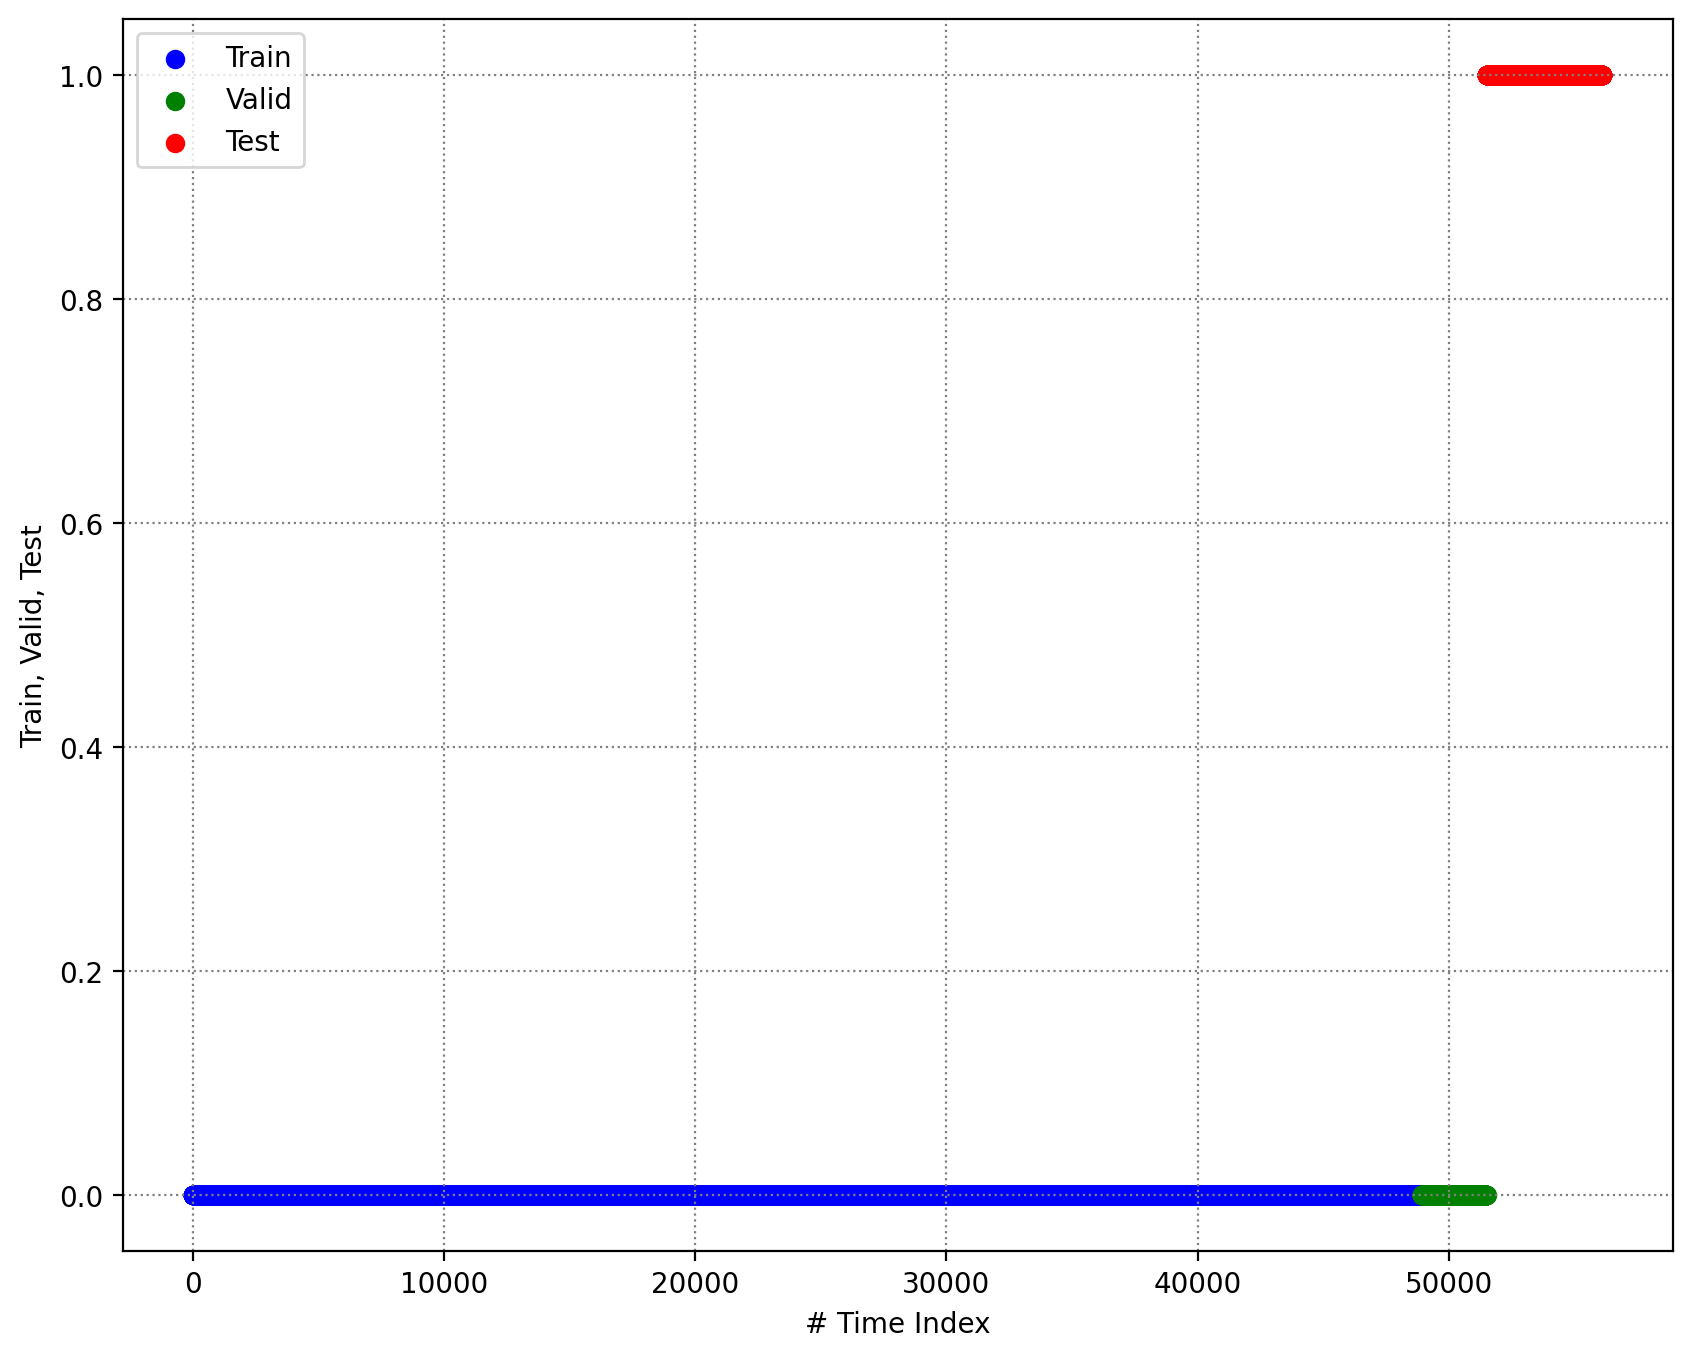

Number of abnormal points before out: 134
Number of abnormal points after out: 4460
Total number of points before out: 51653
Total number of points after out: 4464
Total number of points: 56118
Total number of abnormal points: 4594
False Positive Rate (오탐지율): 0.2459104030792259


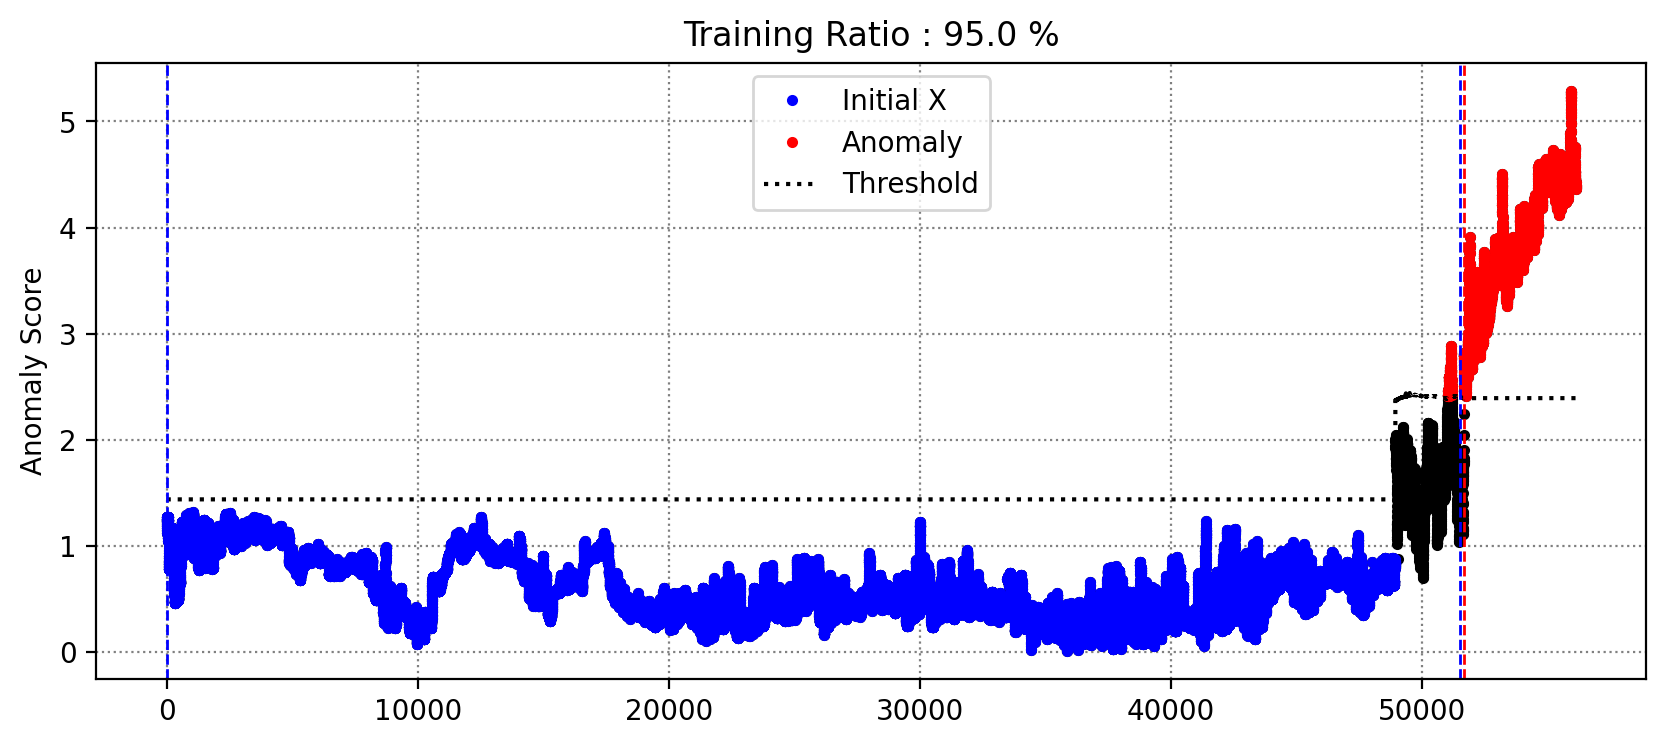

In [15]:
train_ratio = 0.95
run_all(train_ratio, df_label0, outpoint)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))

# 전체 데이터 플롯
plt.subplot(3, 3, 1)
plt.plot(df_input.iloc[:, 0], label='CG1')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(3, 3, 2)
plt.plot(df_input.iloc[:, 1], label='CG2')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(3, 3, 3)
plt.plot(df_input.iloc[:, 2], label='CG3')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(3, 3, 4)
plt.plot(df_input.iloc[:, 3], label='CG4')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(3, 3, 5)
plt.plot(df_input.iloc[:, 4], label='TT1')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(3, 3, 6)
plt.plot(df_input.iloc[:, 5], label='TT2')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(3, 3, 7)
plt.plot(df_input.iloc[:, 6], label='TT3')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(3, 3, 8)
plt.plot(df_input.iloc[:, 7], label='TT4')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(3, 3, 9)
plt.plot(df_input.iloc[:, 8], label='TC1')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
# plt.subplot(1, 3, 3)
# plt.plot(df_input.iloc[:, 2], label='TT1')
# plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
# plt.xlabel('Time Index')
# plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))

# 전체 데이터 플롯
plt.subplot(2, 2, 1)
plt.plot(df_input.iloc[:, 0], label='TT1')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(df_input.iloc[:, 1], label='TT2')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(df_input.iloc[:, 2], label='TC1')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(df_input.iloc[:, 3], label='TC2')
plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Index')
plt.legend()


plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 7))

# 전체 데이터 플롯
for i, column_name in enumerate(df_input.columns):
    plt.subplot(2, 3, i+1)
    plt.plot(df_input.iloc[:, i], label=column_name)
    if isinstance(outpoint, pd.DataFrame):
        for _, row in outpoint.iterrows():
            plt.axvline(x=row['data'], color='r', linestyle='--', linewidth=1)
    else:
        plt.axvline(x=outpoint, color='r', linestyle='--', linewidth=1)
    plt.xlabel('Time Index')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

# 전체 데이터 플롯
for i, column_name in enumerate(df_input.columns):
    plt.subplot(1, 5, i+1)
    plt.plot(df_input.iloc[:, i], label=column_name)
    for _, row in outpoint.iterrows():
        plt.axvline(x=row['data'], color='r', linestyle='--', linewidth=1)
    plt.xlabel('Time Index')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
column_labels = df_input.columns.tolist()

plt.figure(figsize = (4,4))
plt.scatter(df_input.iloc[:index2, 0],df_input.iloc[:index2, 1], color ='r')
plt.scatter(df_input.iloc[index2:, 0],df_input.iloc[index2:, 1], color ='b')
plt.legend(labels=['Initial', 'Test'])
plt.xlabel(column_labels[0])
plt.ylabel(column_labels[1])
plt.show()



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = {
    'feature1': df_input.iloc[:,0],
    'feature2': df_input.iloc[:,1]
}

data_df = pd.DataFrame(data)

# 데이터 스케일링 (평균 0, 분산 1로 스케일링)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_df.iloc[:, :2])

# PCA 수행
pca = PCA(n_components=2)
pc_scores = pca.fit_transform(scaled_data)

# 주성분 PC1의 변동성 확인
print("PC1 explained variance ratio:", pca.explained_variance_ratio_[0])

# 결과 시각화
plt.figure(figsize=(6, 6))
plt.scatter(pc_scores[:, 0], pc_scores[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Result')
plt.show()